In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv('top_10000_1960-JCSM1.csv')

In [6]:
data.head()

,Track Name,Artist Name(s),Album Name,Album Artist Name(s),Album Release Date,Disc Number,Track Number,Track Duration (ms),Explicit,Popularity,...,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Label,Copyrights
0,Justified & Ancient - Stand by the Jams,The KLF,Songs Collection,The KLF,1992-08-03,1,3,216270,False,0,...,1.0,0.0480,0.0158,0.112000,0.4080,0.504,111.458,4.0,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communic..."
1,I Know You Want Me (Calle Ocho),Pitbull,Pitbull Starring In Rebelution,Pitbull,2009-10-23,1,3,237120,False,64,...,1.0,0.1490,0.0142,0.000021,0.2370,0.800,127.045,4.0,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Son..."
2,From the Bottom of My Broken Heart,Britney Spears,...Baby One More Time (Digital Deluxe Version),Britney Spears,1999-01-12,1,6,312533,False,56,...,1.0,0.0305,0.5600,0.000001,0.3380,0.706,74.981,4.0,Jive,P (P) 1999 Zomba Recording LLC
3,Apeman - 2014 Remastered Version,The Kinks,"Lola vs. Powerman and the Moneygoround, Pt. On...",The Kinks,2014-10-20,1,11,233400,False,42,...,1.0,0.2590,0.5680,0.000051,0.0384,0.833,75.311,4.0,Sanctuary Records,"C © 2014 Sanctuary Records Group Ltd., a BMG C..."
4,You Can't Always Get What You Want,The Rolling Stones,Let It Bleed,The Rolling Stones,1969-12-05,1,9,448720,False,0,...,1.0,0.0687,0.6750,0.000073,0.2890,0.497,85.818,4.0,Universal Music Group,"C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ..."


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Track Name            9998 non-null   object        
 1   Artist Name(s)        9998 non-null   object        
 2   Album Name            9998 non-null   object        
 3   Album Artist Name(s)  9997 non-null   object        
 4   Album Release Date    9997 non-null   object        
 5   Disc Number           9999 non-null   int64         
 6   Track Number          9999 non-null   int64         
 7   Track Duration (ms)   9999 non-null   int64         
 8   Explicit              9999 non-null   bool          
 9   Popularity            9999 non-null   int64         
 10  ISRC                  9996 non-null   object        
 11  Added By              9999 non-null   object        
 12  Added At              9999 non-null   object        
 13  Artist Genres     

In [12]:
data['Album Release Date']=pd.to_datetime(data['Album Release Date'], errors='coerce')

In [13]:
data['Year']=data['Album Release Date'].dt.year

In [14]:
data.head()

,Track Name,Artist Name(s),Album Name,Album Artist Name(s),Album Release Date,Disc Number,Track Number,Track Duration (ms),Explicit,Popularity,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Label,Copyrights,Year
0,Justified & Ancient - Stand by the Jams,The KLF,Songs Collection,The KLF,1992-08-03,1,3,216270,False,0,...,0.0480,0.0158,0.112000,0.4080,0.504,111.458,4.0,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communic...",1992.0
1,I Know You Want Me (Calle Ocho),Pitbull,Pitbull Starring In Rebelution,Pitbull,2009-10-23,1,3,237120,False,64,...,0.1490,0.0142,0.000021,0.2370,0.800,127.045,4.0,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Son...",2009.0
2,From the Bottom of My Broken Heart,Britney Spears,...Baby One More Time (Digital Deluxe Version),Britney Spears,1999-01-12,1,6,312533,False,56,...,0.0305,0.5600,0.000001,0.3380,0.706,74.981,4.0,Jive,P (P) 1999 Zomba Recording LLC,1999.0
3,Apeman - 2014 Remastered Version,The Kinks,"Lola vs. Powerman and the Moneygoround, Pt. On...",The Kinks,2014-10-20,1,11,233400,False,42,...,0.2590,0.5680,0.000051,0.0384,0.833,75.311,4.0,Sanctuary Records,"C © 2014 Sanctuary Records Group Ltd., a BMG C...",2014.0
4,You Can't Always Get What You Want,The Rolling Stones,Let It Bleed,The Rolling Stones,1969-12-05,1,9,448720,False,0,...,0.0687,0.6750,0.000073,0.2890,0.497,85.818,4.0,Universal Music Group,"C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ...",1969.0


In [15]:
data.to_csv('top_10000_1960-JCSM2.csv', index=False)

<Axes: >

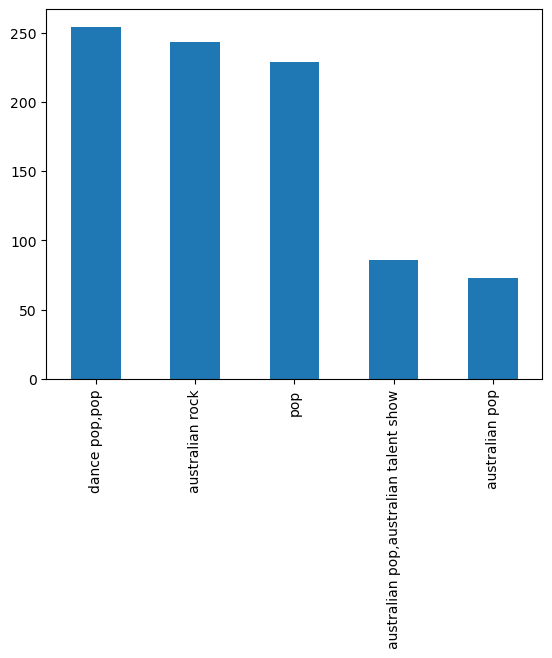

In [17]:
data['Artist Genres'].value_counts().head().plot(kind='bar')

<Axes: ylabel='Artist Genres'>

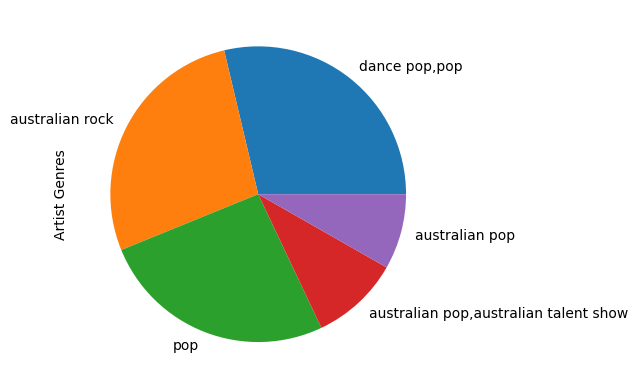

In [18]:
data['Artist Genres'].value_counts().head().plot(kind='pie')